In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# 서포트 벡터 머신(SVM)

## (1) 데이터 구성하기

In [2]:
df_raw=pd.read_csv("/Users/lee/Week3/HMEQ.csv",engine="python",encoding='cp949')
df_raw.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


## (2) 결측치 처리

In [3]:
#결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other",inplace=True)
df_raw.fillna(df_raw.mean(),inplace=True)

## (3) 더미 변수 생성

In [5]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
df_raw=df_raw_dummy
df_raw_y=df_raw["BAD"]
df_raw_x=df_raw.drop("BAD",axis=1,inplace=False)

## (4) 데이터 분할

In [7]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

## (5) 기본옵션모델 설정

In [8]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

SVC(random_state=1234)

In [9]:
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.908
Accuracy on test set:0.908


## (6) C parameter 설정

In [10]:
train_accuracy=[];test_accuracy=[];
para_c =[10**c for c in range(0,5)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["Train Accuracy"]=train_accuracy
df_accuracy_c["Test Accuracy"]=test_accuracy

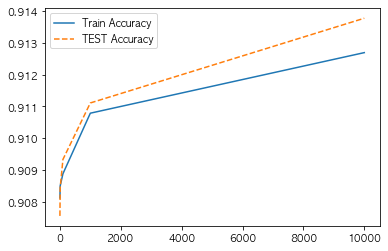

In [11]:
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [12]:
df_accuracy_c.round(3)

,C,Train Accuracy,Test Accuracy
0,1,0.908,0.908
1,10,0.909,0.908
2,100,0.909,0.909
3,1000,0.911,0.911
4,10000,0.913,0.914


## (7) Gamma parameter 설정

In [13]:
train_accuracy=[];test_accuracy=[];
para_gamma =[10**gamma for gamma in range(-5,5)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["Train Accuracy"]=train_accuracy
df_accuracy_gamma["Test Accuracy"]=test_accuracy

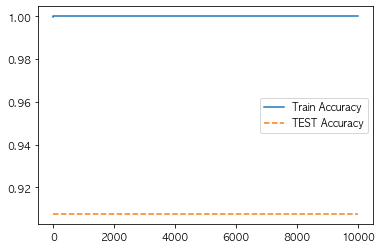

In [14]:
plt.plot(para_gamma,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [15]:
df_accuracy_gamma.round(3)

,gamma,Train Accuracy,Test Accuracy
0,0.000,1.0,0.908
1,0.000,1.0,0.908
2,0.001,1.0,0.908
3,0.010,1.0,0.908
4,0.100,1.0,0.908
5,1.000,1.0,0.908
6,10.000,1.0,0.908
7,100.000,1.0,0.908
8,1000.000,1.0,0.908
9,10000.000,1.0,0.908


## (8) scale 변환

In [16]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [17]:
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled,test_size=0.3,random_state=1234)

## (9) SVC 모델 재 설정

In [18]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_scaled_train_x,df_train_y)

SVC(random_state=1234)

In [19]:
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.944
Accuracy on test set:0.935


## (10) C parameter 설정

In [20]:
train_accuracy=[];test_accuracy=[];
para_c =[10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["Train Accuracy"]=train_accuracy
df_accuracy_c["Test Accuracy"]=test_accuracy

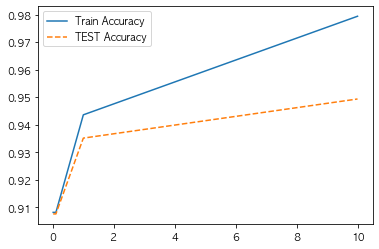

In [21]:
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [22]:
df_accuracy_c.round(3)

,C,Train Accuracy,Test Accuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


## (11) Gamma parameter 설정

In [23]:
train_accuracy=[];test_accuracy=[];
para_gamma =[10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["Train Accuracy"]=train_accuracy
df_accuracy_gamma["Test Accuracy"]=test_accuracy

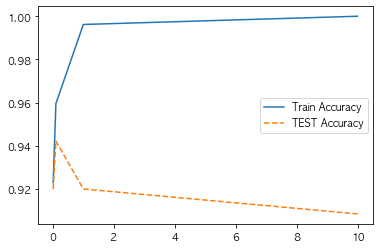

In [24]:
plt.plot(para_gamma,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [25]:
df_accuracy_gamma.round(3)

,gamma,Train Accuracy,Test Accuracy
0,0.01,0.923,0.920
1,0.10,0.960,0.942
2,1.00,0.996,0.920
3,10.00,1.000,0.908


## (12) 최종 모델 선택

In [26]:
svc_final=SVC(gamma=0.1, C=1, random_state=1234)

svc_final.fit(df_scaled_train_x,df_train_y)

y_pred=svc_final.predict(df_scaled_test_x)

print("Traning set 정확도 : {:.3f}".format(svc_final.score(df_scaled_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(svc_final.score(df_scaled_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.960
TEST set 정확도 : 0.942
Confusion matrix:
[[1021    0]
 [  65   39]]


## (13) GRIDSEARCHCV